# Prophet Outlier Comparison

## Results


In [67]:
results # Run the other cells first

,technique,mape,num_rows,mean,median
0,Keeping all outliers,81.57,364,135527.94,125401.22
1,"Dropping outliers, z=2",10.02,352,133858.61,124244.77
2,"Dropping outliers, z=3",11.04,360,135000.59,125023.87
3,Z-score = 2 outliers=mean,10.28,364,133913.64,125742.62
4,Z-score = 3 outliers=mean,11.18,364,135006.39,125580.02
5,"Outlier = previous week, z=3",10.92,364,135474.68,125580.02
6,"Outlier = previous week, z=2",9.52,364,134771.98,125023.87
7,"z-score=3, outlier = median",11.29,364,134895.11,125401.22
8,"z-score=2, outlier = median",10.82,364,133579.79,125401.22
9,Log transformed data,82.22,364,11.78,11.74


## Dependencies


In [54]:
# essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools 
from utils import create_session, mape


# model
from prophet import Prophet
from prophet.diagnostics import cross_validation


# Snowflake
from snowflake.snowpark import Session

## Data Setup

In [55]:
session = create_session()

df = session.table("company_revenue_time_series_1") #with cutoff
df = df.to_pandas()

df = df.rename(columns={'DATE': 'ds', 'REVENUE': 'y'})
df = df[['ds', 'y']] # drop everything but these two if there are any

df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values(by='ds')
df = df.reset_index(drop=True)

print(df.head())
print(df.info())

          ds          y
0 2012-03-02  137233.99
1 2012-03-03  190247.55
2 2012-03-04  197809.12
3 2012-03-05  125417.64
4 2012-03-06  120953.92
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      364 non-null    datetime64[ns]
 1   y       364 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
None


## Evaluating results setup

In [56]:
results = pd.DataFrame(columns=['technique', 'mape', 'num_rows', 'mean', 'median'])

def evaluate_technique(df_in, name):

    # Setup results
        # name of technique
        # mape
        # num_rows
        # mean
        # median

    # Fit the model
    params_dict = {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9, 'weekly_seasonality': True, 'growth': 'linear'}
    
    model = Prophet(
        **params_dict
    )
    model.fit(df_in)

    # Cross validation results 
    df_in_cv = cross_validation(model, 
                         initial='230 days',  # Training set size
                         period='15 days',    # Cutoff frequency
                         horizon='15 days',   # Forecast horizon
                         disable_tqdm=True)   
    

    actual_values = df_in_cv['y']
    predicted_values = df_in_cv['yhat']

    print(len(predicted_values))
    # Calculate total MAPE

    total_mape = mape(actual_values, predicted_values)
    print(len(predicted_values))
    print(f'Total MAPE: {total_mape}%')

    mean = df_in['y'].mean()
    median = df_in['y'].median()

    entry = {
        'technique': name,
        'mape': round(total_mape, 2),            
        'num_rows': len(df_in),        
        'mean': round(mean, 2),         
        'median': round(median, 2)          
    }

    results.loc[len(results)] = entry

    return results

def plot_timeseries(df, title):
    fig, ax = plt.subplots(figsize=(6, 3))
    df.plot(x='ds', ax=ax, title=title)
    ax.set_ylim(df['y'].min(), df['y'].max())
    
    plt.show()

## Outlier Removal Techniques


#### Leave all outliers (baseline)

13:37:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
13:37:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
13:37:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
13:37:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
13:37:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
13:37:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
13:37:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
13:37:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
13:37:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1]

120
120
Total MAPE: 81.57%


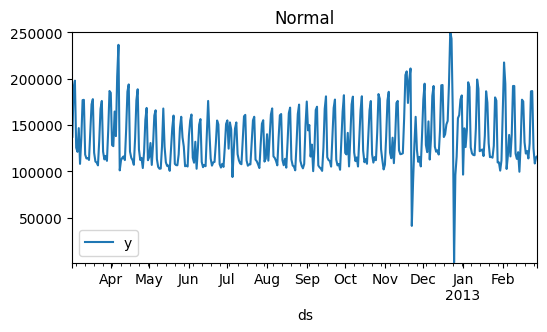

In [57]:
evaluate_technique(df, "Keeping all outliers")
plot_timeseries(df, "Normal")

#### Z-score outlier selection. Dropping them.

13:37:33 - cmdstanpy - INFO - Chain [1] start processing
13:37:33 - cmdstanpy - INFO - Chain [1] done processing
13:37:33 - cmdstanpy - INFO - Chain [1] start processing


Dropping 12 rows.


13:37:33 - cmdstanpy - INFO - Chain [1] done processing
13:37:33 - cmdstanpy - INFO - Chain [1] start processing
13:37:33 - cmdstanpy - INFO - Chain [1] done processing
13:37:33 - cmdstanpy - INFO - Chain [1] start processing
13:37:33 - cmdstanpy - INFO - Chain [1] done processing
13:37:33 - cmdstanpy - INFO - Chain [1] start processing
13:37:33 - cmdstanpy - INFO - Chain [1] done processing
13:37:33 - cmdstanpy - INFO - Chain [1] start processing
13:37:33 - cmdstanpy - INFO - Chain [1] done processing
13:37:33 - cmdstanpy - INFO - Chain [1] start processing
13:37:33 - cmdstanpy - INFO - Chain [1] done processing
13:37:33 - cmdstanpy - INFO - Chain [1] start processing
13:37:34 - cmdstanpy - INFO - Chain [1] done processing
13:37:34 - cmdstanpy - INFO - Chain [1] start processing
13:37:34 - cmdstanpy - INFO - Chain [1] done processing


110
110
Total MAPE: 10.02%


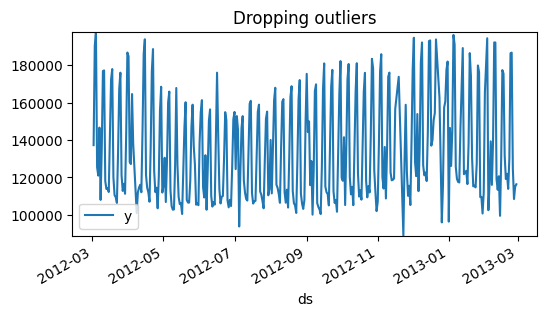

In [58]:
# z-score = 2
mean = df['y'].mean()
std = df['y'].std()

z_scores = (df['y'] - mean) / std

threshold = 2
outlier_index = np.where(np.abs(z_scores) > threshold)[0]
print("Dropping "+str(len(outlier_index)) + " rows.")

df_drop_2 = df.copy()

df_drop_2.drop(index=outlier_index,inplace=True)

evaluate_technique(df_drop_2, "Dropping outliers, z=2")
plot_timeseries(df_drop_2, "Dropping outliers")

In [59]:
# z score = 3

threshold = 3
outlier_index = np.where(np.abs(z_scores) > threshold)[0]

print("Dropping "+str(len(outlier_index)) + " rows.")

df_drop_3 = df.copy()
df_drop_3.drop(index=outlier_index,inplace=True)

evaluate_technique(df_drop_3, "Dropping outliers, z=3")

13:37:34 - cmdstanpy - INFO - Chain [1] start processing
13:37:34 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing


Dropping 4 rows.


13:37:35 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:35 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:35 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:35 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:35 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:35 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:35 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:35 - cmdstanpy - INFO - Chain [1] done processing


117
117
Total MAPE: 11.04%


,technique,mape,num_rows,mean,median
0,Keeping all outliers,81.57,364,135527.94,125401.22
1,"Dropping outliers, z=2",10.02,352,133858.61,124244.77
2,"Dropping outliers, z=3",11.04,360,135000.59,125023.87


#### Z-score outlier selection. Setting them equal to mean

13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:35 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:35 - cmdstanpy - INFO - Chain [1] done processing
13:37:35 - cmdstanpy - INFO - Chain [1] start processing
13:37:36 - cmdstanpy - INFO - Chain [1] done processing
13:37:36 - cmdstanpy - INFO - Chain [1] start processing
13:37:36 - cmdstanpy - INFO - Chain [1] done processing
13:37:36 - cmdstanpy - INFO - Chain [1] start processing
13:37:36 - cmdstanpy - INFO - Chain [1] done processing
13:37:36 - cmdstanpy - INFO - Chain [1] start processing
13:37:36 - cmdstanpy - INFO - Chain [1] done processing
13:37:36 - cmdstanpy - INFO - Chain [1] start processing
13:37:36 - cmdstanpy - INFO - Chain [1] done processing
13:37:36 - cmdstanpy - INFO - Chain [1] start processing
13:37:36 - cmdstanpy - INFO - Chain [1] done processing
13:37:36 - cmdstanpy - INFO - Chain [1] start processing
13:37:36 - cmdstanpy - INFO - Chain [1]

120
120
Total MAPE: 10.28%


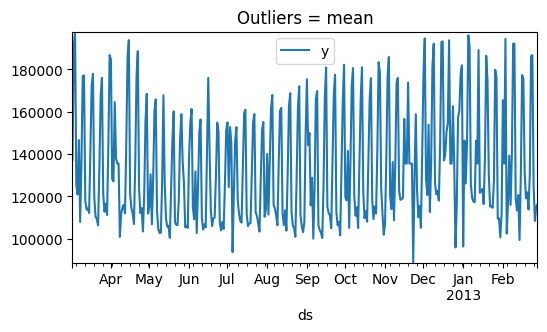

In [60]:
threshold = 2

df_mean_2 = df.copy()
df_mean_2['y'] = np.where(np.abs(z_scores) > threshold, mean, df_mean_2['y'])

evaluate_technique(df_mean_2, "Z-score = 2 outliers=mean")
plot_timeseries(df_mean_2, "Outliers = mean")

In [61]:
threshold = 3

df_mean_3 = df.copy()
df_mean_3['y'] = np.where(np.abs(z_scores) > threshold, mean, df_mean_3['y'])

evaluate_technique(df_mean_3, "Z-score = 3 outliers=mean")

13:37:37 - cmdstanpy - INFO - Chain [1] start processing
13:37:37 - cmdstanpy - INFO - Chain [1] done processing
13:37:37 - cmdstanpy - INFO - Chain [1] start processing
13:37:37 - cmdstanpy - INFO - Chain [1] done processing
13:37:37 - cmdstanpy - INFO - Chain [1] start processing
13:37:37 - cmdstanpy - INFO - Chain [1] done processing
13:37:37 - cmdstanpy - INFO - Chain [1] start processing
13:37:37 - cmdstanpy - INFO - Chain [1] done processing
13:37:38 - cmdstanpy - INFO - Chain [1] start processing
13:37:38 - cmdstanpy - INFO - Chain [1] done processing
13:37:38 - cmdstanpy - INFO - Chain [1] start processing
13:37:38 - cmdstanpy - INFO - Chain [1] done processing
13:37:38 - cmdstanpy - INFO - Chain [1] start processing
13:37:38 - cmdstanpy - INFO - Chain [1] done processing
13:37:38 - cmdstanpy - INFO - Chain [1] start processing
13:37:38 - cmdstanpy - INFO - Chain [1] done processing
13:37:38 - cmdstanpy - INFO - Chain [1] start processing
13:37:38 - cmdstanpy - INFO - Chain [1]

120
120
Total MAPE: 11.18%


,technique,mape,num_rows,mean,median
0,Keeping all outliers,81.57,364,135527.94,125401.22
1,"Dropping outliers, z=2",10.02,352,133858.61,124244.77
2,"Dropping outliers, z=3",11.04,360,135000.59,125023.87
3,Z-score = 2 outliers=mean,10.28,364,133913.64,125742.62
4,Z-score = 3 outliers=mean,11.18,364,135006.39,125580.02


#### Z-score outlier selection, setting the outlier values equal to the same day the previous week

In [62]:
threshold = 3

outlier_index = np.where(np.abs(z_scores) > threshold)[0]

df_drop_3 = df.copy()

for i in outlier_index:
    if i < 7:
        df_drop_3['y'].loc[i] = df_drop_3['y'].loc[i + 7] # if no previous data exist. 
    df_drop_3['y'].loc[i] = df_drop_3['y'].loc[i - 7]

evaluate_technique(df_drop_3, "Outlier = previous week, z=3")

13:37:38 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1] done processing
13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1] done processing
13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1] done processing
13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1] done processing
13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1] done processing
13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1] done processing
13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1] done processing
13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1] done processing
13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1]

120
120
Total MAPE: 10.92%


,technique,mape,num_rows,mean,median
0,Keeping all outliers,81.57,364,135527.94,125401.22
1,"Dropping outliers, z=2",10.02,352,133858.61,124244.77
2,"Dropping outliers, z=3",11.04,360,135000.59,125023.87
3,Z-score = 2 outliers=mean,10.28,364,133913.64,125742.62
4,Z-score = 3 outliers=mean,11.18,364,135006.39,125580.02
5,"Outlier = previous week, z=3",10.92,364,135474.68,125580.02


In [63]:
threshold = 2

outlier_index = np.where(np.abs(z_scores) > threshold)[0]

df_drop_2 = df.copy()

for i in outlier_index:
    if i < 7:
        df_drop_2['y'].loc[i] = df_drop_2['y'].loc[i + 7] # if no previous data exist. 
    df_drop_2['y'].loc[i] = df_drop_2['y'].loc[i - 7]

evaluate_technique(df_drop_2, "Outlier = previous week, z=2")

13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:39 - cmdstanpy - INFO - Chain [1] done processing
13:37:39 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1]

120
120
Total MAPE: 9.52%


,technique,mape,num_rows,mean,median
0,Keeping all outliers,81.57,364,135527.94,125401.22
1,"Dropping outliers, z=2",10.02,352,133858.61,124244.77
2,"Dropping outliers, z=3",11.04,360,135000.59,125023.87
3,Z-score = 2 outliers=mean,10.28,364,133913.64,125742.62
4,Z-score = 3 outliers=mean,11.18,364,135006.39,125580.02
5,"Outlier = previous week, z=3",10.92,364,135474.68,125580.02
6,"Outlier = previous week, z=2",9.52,364,134771.98,125023.87


#### Z-score outlier selection. Setting them equal to median

In [64]:
threshold = 3

df_median_3 = df.copy()

median = df_median_3['y'].median()

df_median_3['y'] = np.where(np.abs(z_scores) > threshold, median, df_median_3['y'])

evaluate_technique(df_median_3, "z-score=3, outlier = median")

13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:40 - cmdstanpy - INFO - Chain [1] start processing
13:37:40 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1]

120
120
Total MAPE: 11.29%


,technique,mape,num_rows,mean,median
0,Keeping all outliers,81.57,364,135527.94,125401.22
1,"Dropping outliers, z=2",10.02,352,133858.61,124244.77
2,"Dropping outliers, z=3",11.04,360,135000.59,125023.87
3,Z-score = 2 outliers=mean,10.28,364,133913.64,125742.62
4,Z-score = 3 outliers=mean,11.18,364,135006.39,125580.02
5,"Outlier = previous week, z=3",10.92,364,135474.68,125580.02
6,"Outlier = previous week, z=2",9.52,364,134771.98,125023.87
7,"z-score=3, outlier = median",11.29,364,134895.11,125401.22


In [65]:
threshold = 2

df_median_2 = df.copy()

median = df_median_2['y'].median()

df_median_2['y'] = np.where(np.abs(z_scores) > threshold, median, df_median_2['y'])

evaluate_technique(df_median_2, "z-score=2, outlier = median")

13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:41 - cmdstanpy - INFO - Chain [1] done processing
13:37:41 - cmdstanpy - INFO - Chain [1] start processing
13:37:42 - cmdstanpy - INFO - Chain [1]

120
120
Total MAPE: 10.82%


,technique,mape,num_rows,mean,median
0,Keeping all outliers,81.57,364,135527.94,125401.22
1,"Dropping outliers, z=2",10.02,352,133858.61,124244.77
2,"Dropping outliers, z=3",11.04,360,135000.59,125023.87
3,Z-score = 2 outliers=mean,10.28,364,133913.64,125742.62
4,Z-score = 3 outliers=mean,11.18,364,135006.39,125580.02
5,"Outlier = previous week, z=3",10.92,364,135474.68,125580.02
6,"Outlier = previous week, z=2",9.52,364,134771.98,125023.87
7,"z-score=3, outlier = median",11.29,364,134895.11,125401.22
8,"z-score=2, outlier = median",10.82,364,133579.79,125401.22


#### Log transform

In [66]:
params_dict = {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9, 'weekly_seasonality': True, 'growth': 'linear'}

df_log = df.copy()

df_log['y'] = np.log(df_log['y'])

model = Prophet(
    **params_dict
)
model.fit(df_log)

    # Cross validation results 
df_in_cv = cross_validation(model, 
    initial='230 days',  # Training set size
    period='15 days',    # Cutoff frequency
    horizon='15 days',   # Forecast horizon
    disable_tqdm=True)   


actual_values = df_in_cv['y']
predicted_values = df_in_cv['yhat']

print(len(predicted_values))

# exp
total_mape = mape(np.exp(df_in_cv['y']), np.exp(df_in_cv['yhat']))
print(len(predicted_values))
print(f'MAPE: {total_mape}%')


mean = df_log['y'].mean() # post log
median = df_log['y'].median() # post log

name = "Log transformed data"

entry = {
    'technique': name,
    'mape': round(total_mape, 2),            
    'num_rows': len(df_log),        
    'mean': round(mean, 2),         
    'median': round(median, 2)          
    }

results.loc[len(results)] = entry
results

13:37:42 - cmdstanpy - INFO - Chain [1] start processing


13:37:42 - cmdstanpy - INFO - Chain [1] done processing
13:37:42 - cmdstanpy - INFO - Chain [1] start processing
13:37:42 - cmdstanpy - INFO - Chain [1] done processing
13:37:42 - cmdstanpy - INFO - Chain [1] start processing
13:37:42 - cmdstanpy - INFO - Chain [1] done processing
13:37:42 - cmdstanpy - INFO - Chain [1] start processing
13:37:42 - cmdstanpy - INFO - Chain [1] done processing
13:37:42 - cmdstanpy - INFO - Chain [1] start processing
13:37:42 - cmdstanpy - INFO - Chain [1] done processing
13:37:42 - cmdstanpy - INFO - Chain [1] start processing
13:37:42 - cmdstanpy - INFO - Chain [1] done processing
13:37:42 - cmdstanpy - INFO - Chain [1] start processing
13:37:42 - cmdstanpy - INFO - Chain [1] done processing
13:37:42 - cmdstanpy - INFO - Chain [1] start processing
13:37:42 - cmdstanpy - INFO - Chain [1] done processing
13:37:42 - cmdstanpy - INFO - Chain [1] start processing
13:37:43 - cmdstanpy - INFO - Chain [1] done processing


120
120
MAPE: 82.22%


,technique,mape,num_rows,mean,median
0,Keeping all outliers,81.57,364,135527.94,125401.22
1,"Dropping outliers, z=2",10.02,352,133858.61,124244.77
2,"Dropping outliers, z=3",11.04,360,135000.59,125023.87
3,Z-score = 2 outliers=mean,10.28,364,133913.64,125742.62
4,Z-score = 3 outliers=mean,11.18,364,135006.39,125580.02
5,"Outlier = previous week, z=3",10.92,364,135474.68,125580.02
6,"Outlier = previous week, z=2",9.52,364,134771.98,125023.87
7,"z-score=3, outlier = median",11.29,364,134895.11,125401.22
8,"z-score=2, outlier = median",10.82,364,133579.79,125401.22
9,Log transformed data,82.22,364,11.78,11.74
